In [1]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
    
from utils import *
from jax_utils import *
import matplotlib.pyplot as plt

In [2]:
calculators = load_calculators_from_pickle("/home/pop518504/git/gknet-benchmarks/benchmarks/oom_analysis/oom_analysis.pickle")
# calculators = load_calculators_from_pickle("/home/pop518504/git/gknet-benchmarks/benchmarks/oom_analysis/old_oom_analysis.pickle")

In [3]:
labels = set([c.short_description for c in calculators])

all_properties = list(map(lambda c: c.n, filter(lambda c: c._stress and c._stresses, calculators)))
# all_properties = list(map(lambda c: c.n, all_properties))

only_stress = list(map(lambda c: c.n, filter(lambda c: c._stress and not c._stresses, calculators)))
only_stresses = list(map(lambda c: c.n, filter(lambda c: not c._stress and c._stresses, calculators)))
only_energies_and_forces = list(map(lambda c: c.n, filter(lambda c: not c._stress and not c._stresses and c._jit, calculators)))
only_energies_and_forces_no_jit = list(map(lambda c: c.n, filter(lambda c: not c._stress and not c._stresses and not c._jit, calculators)))

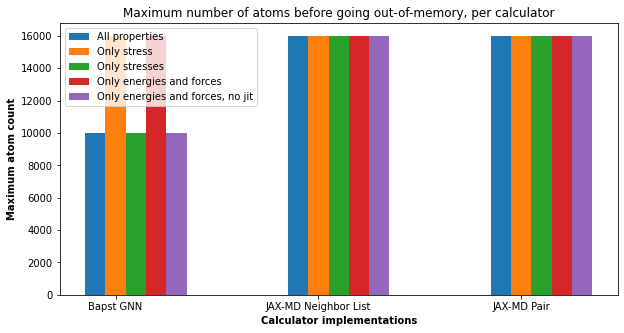

In [4]:
plot_oom_behavior(labels, all_properties, only_stress, only_stresses, only_energies_and_forces, only_energies_and_forces_no_jit)

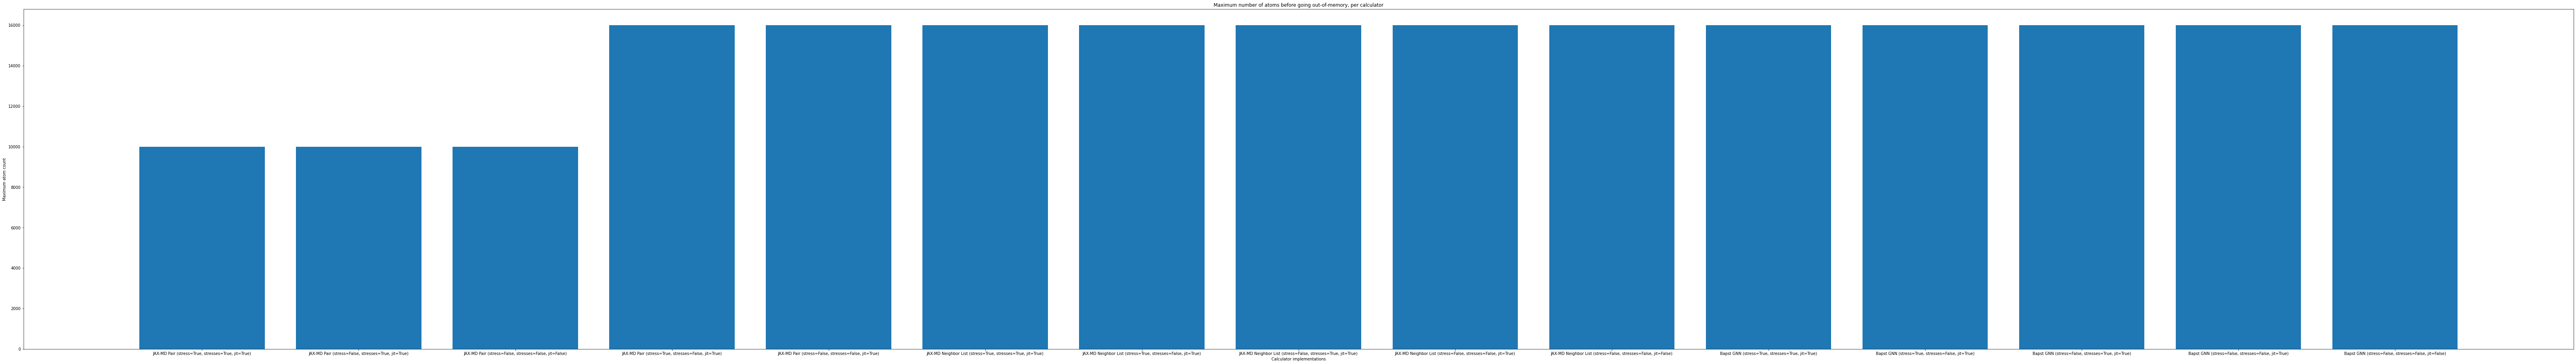

In [7]:
# to verify the previous plot's correctness
labels = [c.description for c in calculators]
values = [c.n for c in calculators]

calculator_types = set([c.short_description for c in calculators])

fig = plt.figure()
ax = fig.add_axes([0, 0, 15, 3])
ax.bar(labels, values)

ax.set_title("Maximum number of atoms before going out-of-memory, per calculator")
ax.set_xlabel("Calculator implementations")
ax.set_ylabel("Maximum atom count")
# ax.legend()

plt.show()